In [84]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Méhtode dichotomie

In [85]:
def dichotomie(f, a: float, b: float, e=0.1):
  m = 0
  i = 0
  while abs(b - a) > e:
    i += 1
    m = float((a + b) / 2.)
    if float(f(a)) * float(f(m)) <= 0.:
        b = m
    else:
        a = m
  return a, b, i


In [86]:
g = 9.81
V0 = 53.0
alpha = 8.0
h =  2.95
f = lambda x : -0.5 * g * ((x  / (V0 * cos(radians(alpha)))) ** 2.) - tan(radians(alpha)) * x + h
e = 0.000001
a, b, iterations = dichotomie(f, 0., 40., e=e)
print("Résultats :")
print(f"Pour {iterations} itérations.")
n = int(1/e)
print(f'f(x) = 0. Il existe x appartenant à [{a:.8f}, {b:.8f}] pour b - a < {e}')
if 11.9 < (a+b)/2. < 18.3:
  print("La balle attértit donc dans le domaine de validité du service.")
else: 
  print("La balle n'attértit donc pas dans le domaine de validité du service.")

Résultats :
Pour 26 itérations.
f(x) = 0. Il existe x appartenant à [17.22926080, 17.22926140] pour b - a < 1e-06
La balle attértit donc dans le domaine de validité du service.


In [87]:
def n_dichotomie(f, a: float, b: float, n):
  m = 0
  for i in range(n+1):
    m = float((a + b) / 2.)
    if float(f(a)) * float(f(m)) <= 0.:
        b = m
    else:
        a = m
  return a, b, i


## Application de test

In [88]:
exp_x = lambda x : cos(x) + sin(x)
a, b, iterations = n_dichotomie(exp_x, 0., 10., 30)
print("Résultats :")
print(f"Pour {iterations} itérations.")
n = int(1/e)
print(f'f(x) = 0. Il existe x appartenant à [{a:.10f}, {b:.10f}]')


Résultats :
Pour 30 itérations.
f(x) = 0. Il existe x appartenant à [2.3561944859, 2.3561944906]


In [89]:
a, b, n = dichotomie(f, 0., 40., e=0.0001)
x = (a+b)/2
print(x)
print(b-a)
print(f(x))
if f(11.9) > 0.92:
  print("passe à ", f(11.9))
else:
  print("Ne passe pas")

17.229270935058594
7.62939453125e-05
-1.9557397354930117e-06
passe à  1.0254043871682712


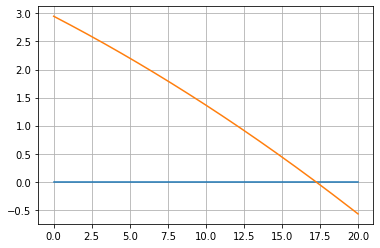

In [90]:
#Plot funtion
x = np.linspace(0., 20.0, num=200)
y = f(x)
plt.plot([x[0], x[-1]], [0,0])
plt.plot(x, y)
plt.grid(True)

# En fonction de Alpha

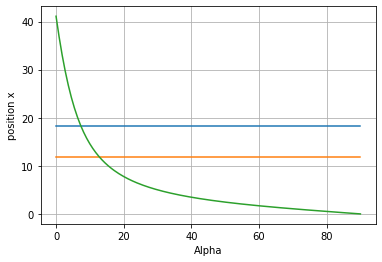

In [91]:
alphas = np.linspace(0., 90.0, num=200)
x = []
for alpha in alphas:
  f = lambda x : -0.5 * g * ((x  / (V0 * cos(radians(alpha)))) ** 2.) - tan(radians(alpha)) * x + h
  a, b, n = n_dichotomie(f, 0., 100., 20)
  x.append((a+b)/2.)
plt.plot([alphas[0], alphas[-1]], [18.3]*2)
plt.plot([alphas[0], alphas[-1]], [11.9]*2)
plt.xlabel("Alpha")
plt.ylabel("position x")
plt.plot(alphas, x)
plt.grid(True)



## En fonction de V0

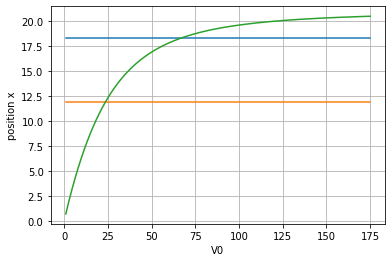

In [92]:
g = 9.81
V0 = 53.0
alpha = 8.0
h =  2.95
v0s = np.linspace(1.0, 175.0, num=200)
x = []
for v in v0s:
  f = lambda x : -0.5 * g * ((x  / (v * cos(radians(alpha)))) ** 2.) - tan(radians(alpha)) * x + h
  a, b, n = n_dichotomie(f, 0., 100., 20)
  x.append((a+b)/2.)
plt.plot([v0s[0], v0s[-1]], [18.3]*2)
plt.plot([v0s[0], v0s[-1]], [11.9]*2)
plt.xlabel("V0")
plt.ylabel("position x")
plt.plot(v0s, x)
plt.grid(True)
